**CAR PRICE PREDICTION WITH MACHINE LEARNING**




In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings


In [ ]:
warnings.filterwarnings("ignore")

Loading Data

In [ ]:
url="https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv"
data=pd.read_csv(url)

Exploring Data

In [ ]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
data=data.dropna()

In [ ]:
data=data.drop_duplicates()

Visualizing Data

<function matplotlib.pyplot.show(close=None, block=None)>

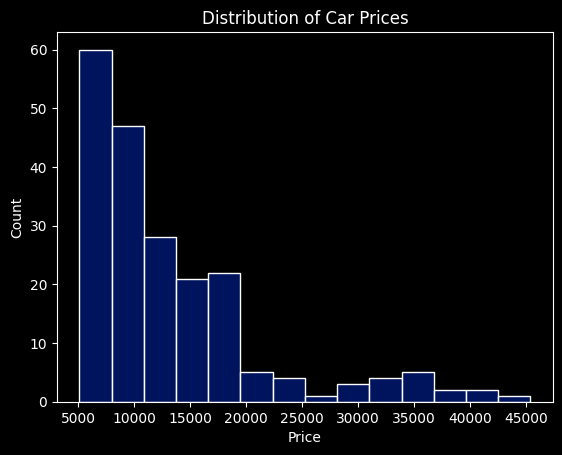

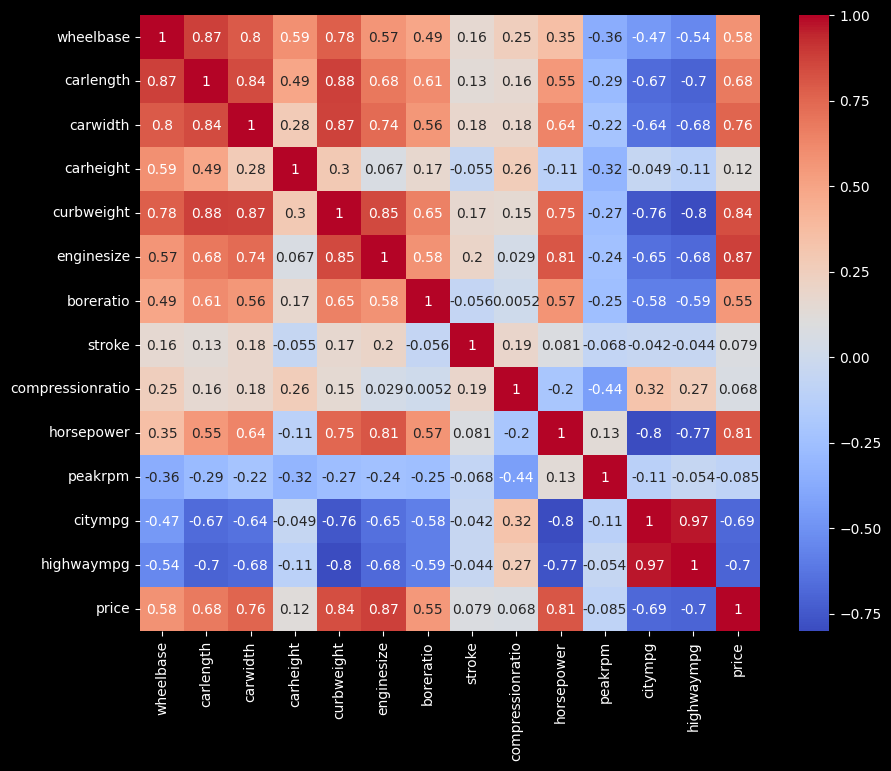

In [ ]:
plt.style.use('dark_background')
sns.set_palette('dark')
sns.histplot(data['price'])
plt.title('Distribution of Car Prices',color='white')
plt.xlabel('Price',color='white')
plt.ylabel('Count',color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show
numeric_features=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
correlation_matrix=data[numeric_features].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show

Preprocessing Data

In [ ]:
feature_cols = ['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','wheelbase','carlength','carwidth','carheight','curbweight','enginetype','cylindernumber','enginesize','fuelsystem','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']
target_col = 'price'
x = data[feature_cols]
y = data[target_col]

In [ ]:
label_encoder = LabelEncoder()
for col in x.columns:
  if x[col].dtype == 'object':
    x[col] = label_encoder.fit_transform(x[col])

Splitting Data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

Fitting the Model

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Evaluating the Model

In [ ]:
predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 3989.535026220401


Deployment and Prediction

In [ ]:
from sqlalchemy.sql.base import ColumnSet
from pandas.core.reshape.encoding import get_dummies
new_car_data = [[3, 'gas','std','two','sedan','fwd','front',100.0,180.0,68.0,56.0,2500,'ohc','four',120,'mpfi',3.50,2.80,8.5,110,5500,30,38]]
new_car_df = pd.DataFrame(new_car_data, columns=feature_cols)
new_car_encoded=pd.get_dummies(new_car_df, drop_first=True)
new_car_encoded=new_car_encoded.reindex(columns=x_train.columns, fill_value=0)
predicted_price = model.predict(new_car_encoded)
print("Predicted Price:",predicted_price)

Predicted Price: [12632.09458377]
